In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
from IPython.display import clear_output

In [3]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['text.usetex'] = False
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
mpl.rcParams['figure.dpi'] = 300

In [4]:
import sys
sys.path.append("..")

In [5]:
# Import the various experiments we need for the notebook
from sva.experiments import Simple2d

# Import the seeding function for reproducibility
from sva.utils import seed_everything

/Users/mc/miniforge3/envs/py3.11-sva/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch default dtype set to torch.float64
torch default device set to cpu


# A simple 2d example

In [6]:
seed_everything(123)

In [7]:
experiments = []
acquisition_functions = ["EI", "UCB", "UCB", "UCB"]
acquisition_function_kwargs = [{}, {"beta": 10.0}, {"beta": 40.0}, {"beta": 100.0}]

for acqf, acqf_kwargs in zip(acquisition_functions, acquisition_function_kwargs):
    experiment = Simple2d()
    experiment.initialize_data(n=3, protocol="random")
    experiment.run(100, acqf, acqf_kwargs)
    experiments.append(experiment)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:10<00:00,  9.09it/s]


In [10]:
# Get the ground truth results
x = experiment.get_dense_coordinates(ppd=100)
y, _ = experiment(x)

In [11]:
extent = experiment.get_experimental_domain_mpl_extent()

From left to right, we have EI, UCB(10), UCB(40) and UCB(100).

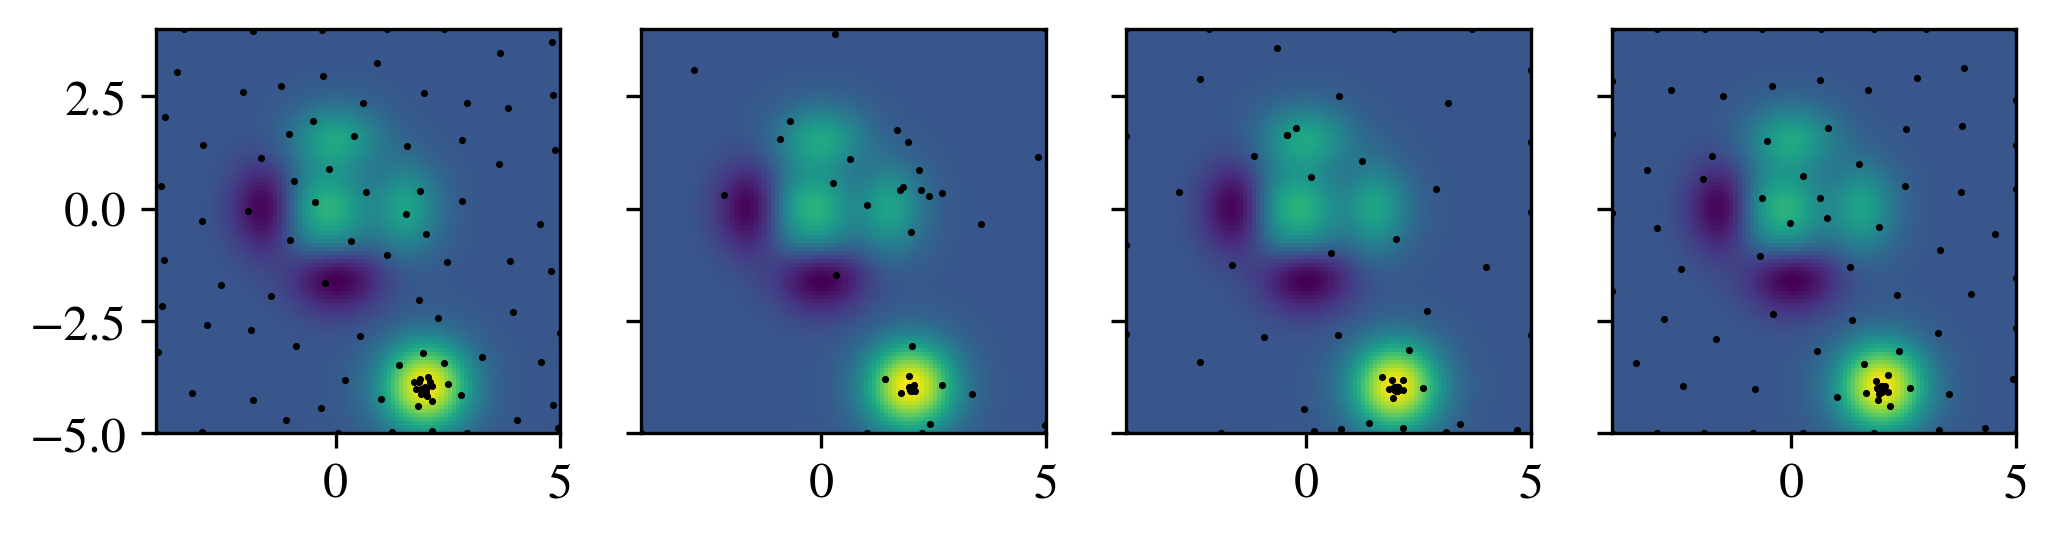

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(8, 3), sharex=True, sharey=True)

for ii, experiment in enumerate(experiments):
    ax = axs[ii]
    X, Y = experiment.data.X, experiment.data.Y
    ax.imshow(y.reshape(100, 100).T, extent=extent, interpolation='nearest', origin='lower')
    ax.scatter(X[:, 0], X[:, 1], color="black", s=0.5)

plt.show()